In [ ]:
# relu : 렐루 함수는 음력은 0으로 양수는 그대로 반환한다.
# 렐루가 어떤 함수인지 그림 넣기

In [9]:
# relu 함수 그리기
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x = np.linspace(-1, 1, 1000)  # 이게 x축

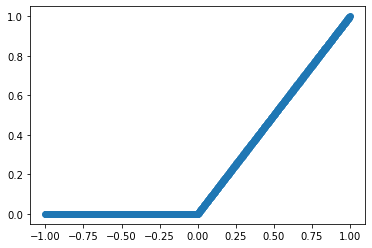

In [8]:
plt.scatter(x, np.maximum(0, x))

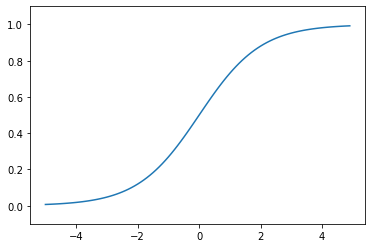

In [ ]:
# 시그모이드 함수
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [ ]:
# output = relu(dot(W, input) + b)

In [ ]:
#퍼셉트론
#엑티베이션 함수?
#각각의 값에 가중치를 다 곱해서 bias 라는 b를 더하고 전체를 더하고 엑티베이션 함수를 거쳐서 아웃풋을 낸다.
#다 더한 값을 바로 보내는게 아니라 이걸 통과 시킬지 안시킬지 고민하는게 판단함수이다.
#그림 첨부

In [ ]:
(1,2,3) * (3,2,1) = (3,4,3) -> np의 곱셈:element-wise 원소 하나하나의 곱
(1,2,3) ●(dot) (3,2,1) = 10 -> dot product(내적, 도트 곱셈을 말한다.)

In [17]:
# 축을 추가한다는것은? p78
a = np.random.randint(1,5,6)
a

array([2, 4, 4, 3, 2, 2])

In [21]:
a.shape

(6,)

1차원이다.

In [18]:
# 2차원으로 바꾸려면?
a.reshape((6,1))

array([[2],
       [4],
       [4],
       [3],
       [2],
       [2]])

In [22]:
a.reshape((6,1)).shape

(6, 1)

2차원이 되었다.

In [25]:
a[:, np.newaxis].shape

(6, 1)

In [26]:
a[np.newaxis, :].shape

(1, 6)

In [27]:
np.expand_dims(a, axis=0).shape

(1, 6)

In [29]:
np.expand_dims(a, axis=1).shape

(6, 1)

In [31]:
a = a.reshape((2,3))
a

array([[2, 4, 4],
       [3, 2, 2]])

In [35]:
# a.shape을 3차원으로 바꾸기
np.expand_dims(a, axis=1).shape

(2, 1, 3)

In [40]:
# 기타1
#a.reshape((2,3,1)).shape
a.reshape((2,3) + (1,)).shape

(2, 3, 1)

In [41]:
# 기타2
a[:, :, None].shape

(2, 3, 1)

여기까지 축을 추가하는 방법

기타 방법은 가급적이면 쓰지 말기 

축을 추가해야지 집어넣을때 모양이 맞는다.

In [42]:
# 텐서 곱셈
a = np.random.randint(1,5,3)
a

array([3, 3, 3])

In [43]:
b = np.random.randint(1,5,3)
b

array([3, 2, 2])

In [44]:
a*b

array([9, 6, 6])

이게 element-wise 곱셈

In [46]:
np.dot(a,b)

21

도트 프로독트와 엘리멘트 와이스는 다르다는 내용

In [47]:
np.maximum(0, (np.dot(a,b) + 2) )

23

In [57]:
a = np.random.randint(-5,5,3)
b = np.random.randint(-5,5,3)

np.maximum(0, (np.dot(a,b) + 2) )

14

계속 실행시키면 0 아니면 양수만 나온다.

out = relu(dot(W, input) + b)와 같다.

In [60]:
np.dot(a,b)

12

12라는 숫자를 스칼라 라고 한다.

스칼라는 벡터(대괄호로 묶여있다.) 가 아닌 하나의 숫자를 뜻한다.

In [ ]:
# p87
학습을 한다는건 가중치가 바뀌어 가는 과정을 학습한다라고 한다.


# 다중분류 : 뉴스 기사 분류

```
다중 : y값이 여러 개 인것

single-label : 정치, 체육, 문화 등등 이렇게 하나로 콕 집어주는것
multi-label  : imf 기사인데 경제이면서 정치기사 , 교동 기사이면서 부동산 기사 인것을 말함
```

In [1]:
# 로이터 데이터셋 로드하기
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
train_data.shape # 1차원 자료로 출력된다.

(8982,)

In [3]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [4]:
# 데이터준비
# 데이터 인코딩

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
from keras.utils.np_utils import to_categorical

```
2가지 방법
- 정수텐서로 변환
- 원핫인코딩으로 변환
```

In [7]:
# 원핫 인코딩으로 바꾸기
# 함수 만들 필요없이 워낙 많이 쓰여서 케라스에서 제공하고 있다. 기억하기
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [8]:
train_labels.shape

(8982,)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras import Sequential #대문자라는 뜻은 클래스 라는 뜻
from keras import optimizers
from keras.layers import Input, Dense

from tensorflow import keras
from tensorflow.keras import layers

In [10]:
model = keras.Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(46, activation='softmax')
])

In [11]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',  # 원핫인코딩일때는 categorical_crossentropy를 꼭 쓴다.
             metrics=['accuracy'])

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [13]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 47ms/step - loss: 2.6773 - accuracy: 0.4640 - val_loss: 1.7598 - val_accuracy: 0.6580
Epoch 2/20
16/16 [==============================] - 0s 24ms/step - loss: 1.4016 - accuracy: 0.7179 - val_loss: 1.2964 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 0s 24ms/step - loss: 1.0238 - accuracy: 0.7800 - val_loss: 1.1123 - val_accuracy: 0.7660
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 0.8026 - accuracy: 0.8290 - val_loss: 1.0255 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 0s 23ms/step - loss: 0.6370 - accuracy: 0.8723 - val_loss: 0.9439 - val_accuracy: 0.8110
Epoch 6/20
16/16 [==============================] - 0s 22ms/step - loss: 0.5019 - accuracy: 0.9005 - val_loss: 0.9217 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 0.4060 - accuracy: 0.9173 - val_loss: 0.8917 - val_accuracy: 0.8170
Epoch 8/20
16

In [14]:
history.history['val_loss']

[1.7598326206207275,
 1.296411395072937,
 1.1122515201568604,
 1.0255473852157593,
 0.9438581466674805,
 0.9216681122779846,
 0.8917044401168823,
 0.879876971244812,
 0.8912789821624756,
 0.9056049585342407,
 0.9327239394187927,
 0.9466373324394226,
 0.9946873188018799,
 1.0753507614135742,
 0.9920619130134583,
 1.0013246536254883,
 0.9880492091178894,
 1.026346206665039,
 1.0594950914382935,
 1.0575965642929077]

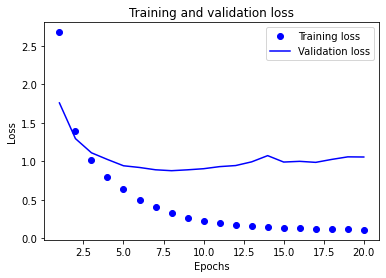

In [15]:
# 훈련과 검증 손실 그리기

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show() 

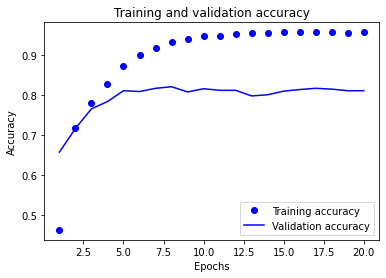

In [16]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() 

In [17]:
# 다시 훈련

model = keras.Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(46, activation='softmax')
])

In [18]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [19]:
model.fit(x_train,
         y_train,
         epochs=9,
         batch_size=512)

Epoch 1/9
18/18 [==============================] - 1s 19ms/step - loss: 2.6142 - accuracy: 0.5505
Epoch 2/9
18/18 [==============================] - 0s 19ms/step - loss: 1.3791 - accuracy: 0.7167
Epoch 3/9
18/18 [==============================] - 0s 18ms/step - loss: 0.9930 - accuracy: 0.7909
Epoch 4/9
18/18 [==============================] - 0s 18ms/step - loss: 0.7662 - accuracy: 0.8426
Epoch 5/9
18/18 [==============================] - 0s 18ms/step - loss: 0.6041 - accuracy: 0.8779
Epoch 6/9
18/18 [==============================] - 0s 19ms/step - loss: 0.4801 - accuracy: 0.9004
Epoch 7/9
18/18 [==============================] - 0s 18ms/step - loss: 0.3856 - accuracy: 0.9182
Epoch 8/9
18/18 [==============================] - 0s 19ms/step - loss: 0.3167 - accuracy: 0.9315
Epoch 9/9
18/18 [==============================] - 0s 18ms/step - loss: 0.2639 - accuracy: 0.9405


In [20]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 0.9434 - accuracy: 0.7907


In [21]:
## 레이블과 손실을 다루는 다른 방법
# 정수 텐서로 변환하는 것
# 이 방식을 사용하려면 손실 함수 하나만 바꾸면 된다. sparse_categorical_crossentropy를 사용해야 한다.
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [22]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])